hyper parameters
-epsilon: min distance for a creating a cluster
-min samples: min samples that satisfies either volume or weight constarint
-noise points: No of unclassified datapoint

Estimated number of clusters: 4
Estimated number of noise points: 17
Homogeneity: 0.809
Completeness: 0.587
V-measure: 0.681
Adjusted Rand Index: 0.648
Adjusted Mutual Information: 0.670
Silhouette Coefficient: 0.388


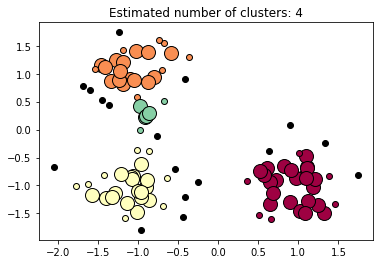

In [104]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[0, 2], [0, -1], [2, -1], [-1, -1], [1, 1], [2, 2]]
X, labels_true = make_blobs(
    n_samples=100, centers=centers, cluster_std=0.4, random_state=42
)

# X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [114]:
dict_ = {-1: [], 0: [], 1: [], 2: [], 3: []}
for i, j in zip(labels, X):
    lst = dict_[i]
    lst.append(j)
    dict_[i] = lst
print(dict_)

{-1: [array([-0.41374049,  0.90968948]), array([-1.36320963,  0.43507852]), array([ 0.63223031, -0.38002624]), array([ 1.32882406, -0.24128281]), array([-1.5914088 ,  0.71206232]), array([-2.04789804, -0.671239  ]), array([-0.96329569, -1.79502757]), array([ 1.7463098 , -0.81046683]), array([-0.24552564, -0.93016887]), array([-0.43888228, -1.56074043]), array([-0.76525716, -0.12381775]), array([-1.44253399,  0.52151735]), array([-1.24068264,  1.74091127]), array([-1.68996713,  0.77508499]), array([-0.54287087, -0.69922679]), array([-0.40884238, -1.20730809]), array([0.89413727, 0.08806767])], 0: [array([ 1.18929505, -1.02913157]), array([ 0.61012733, -0.68516616]), array([ 0.72799011, -0.90709852]), array([ 1.11067632, -0.6691267 ]), array([ 0.64645703, -0.93850996]), array([ 0.90184475, -1.30149447]), array([ 1.38535045, -0.83488763]), array([ 1.32540689, -1.49234573]), array([ 0.64419423, -1.32632411]), array([ 1.02328349, -1.45718812]), array([ 0.82139402, -0.65744048]), array([ 1.2

<h2>Travelling salesman</h2>

In [65]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def som_tsp(data_):
    np.random.RandomState(10)
    N_points = 40
    N_neurons = N_points*2
    t = np.linspace(0, np.pi*2, N_points)
    aaaa = np.array(data_)
    x = aaaa[:, 0]
    y = aaaa[:, 1]

    som = MiniSom(1, N_neurons, 2, sigma=.2, learning_rate=.4,
                  neighborhood_function='gaussian', random_seed=0)
    points = np.array([x,y]).T
    som.random_weights_init(points)
    plt.figure(figsize=(10, 9))
    for i, iterations in enumerate(range(5, 61, 5)):
        som.train(points, iterations, verbose=False, random_order=False)
        plt.subplot(3, 4, i+1)
        plt.scatter(x,y)
        visit_order = np.argsort([som.winner(p)[1] for p in points])
        visit_order = np.concatenate((visit_order, [visit_order[0]]))
        plt.plot(points[visit_order][:,0], points[visit_order][:,1])
        plt.title("iterations: {i};\nerror: {e:.3f}".format(i=iterations, 
                                                            e=som.quantization_error(points)))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

clusters index


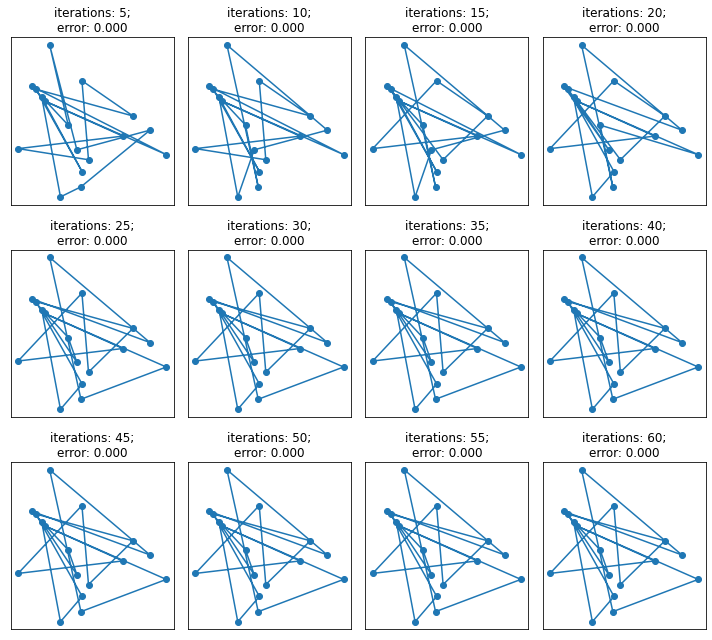

clusters index


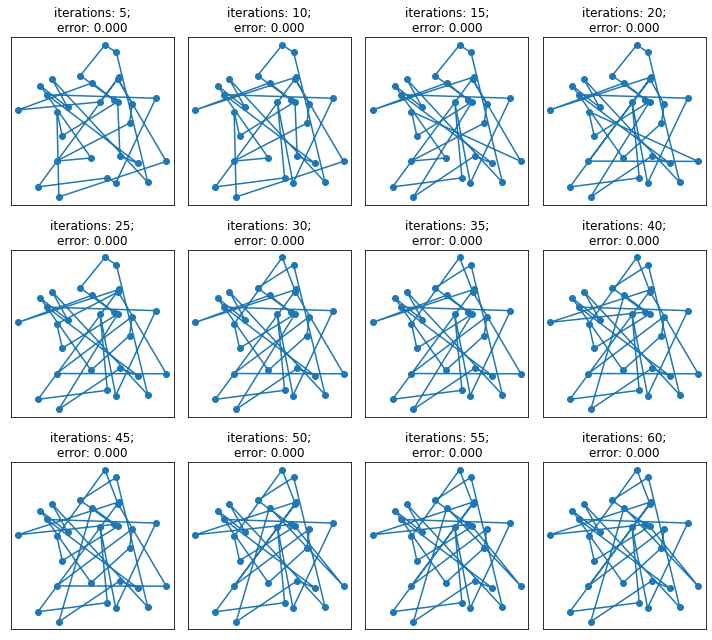

clusters index


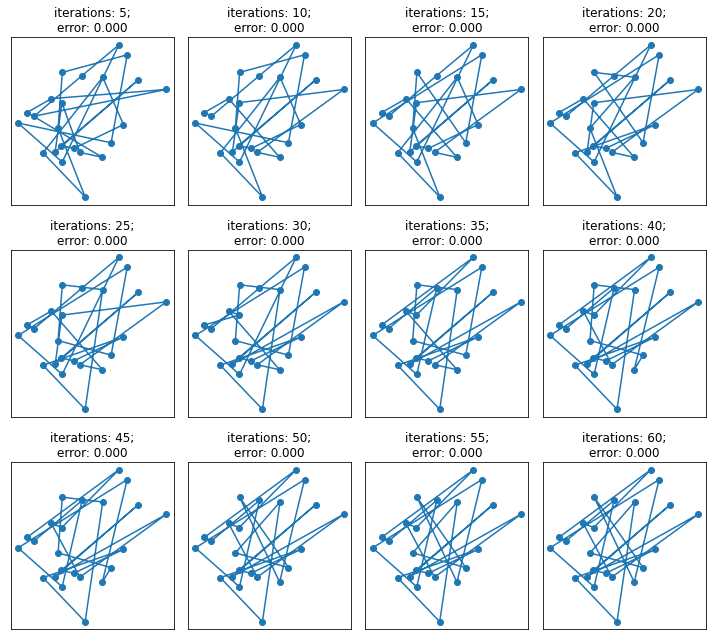

clusters index


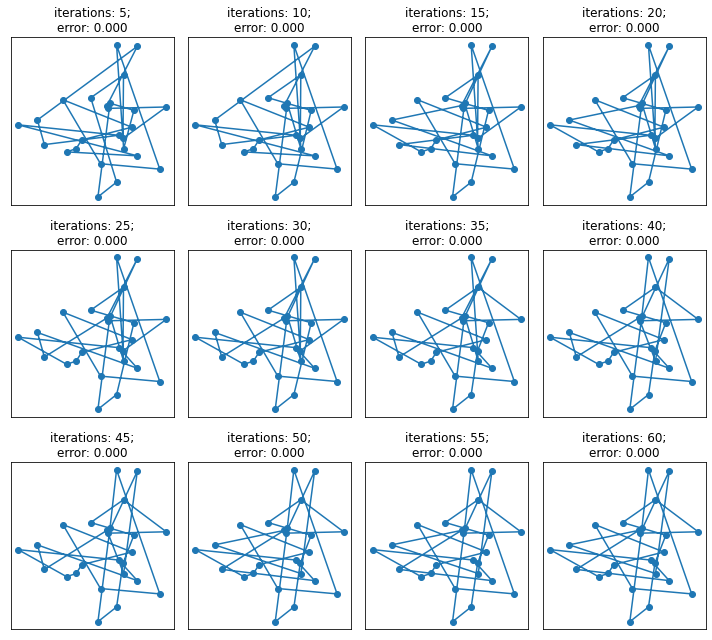

clusters index


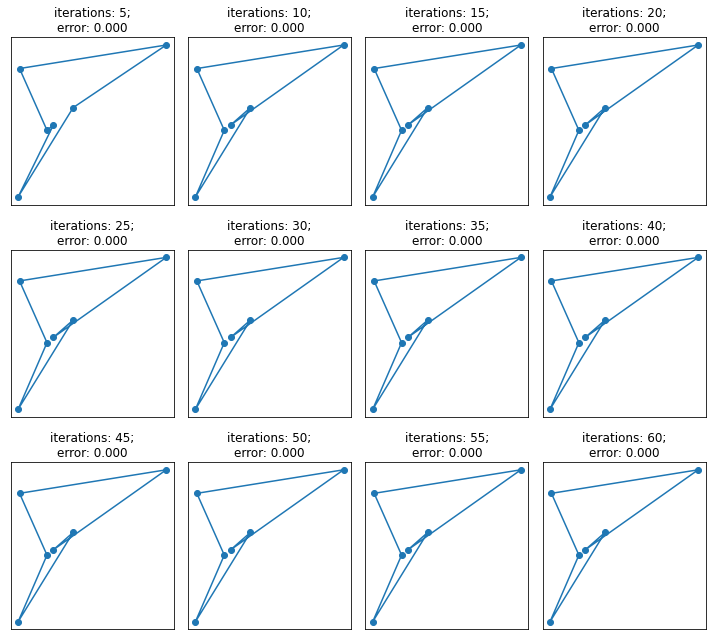

In [117]:
import warnings
warnings.filterwarnings('ignore')
for i in dict_.values():
    print("clusters index")
    som_tsp(i)